In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# Data
data = {
    'Number UEs': [4, 8, 16, 32, 64, 128, 256],
    'Avg CPU (millicores)': [0.00095, 0.0017, 0.0017, 0.0032, 0.0034, 0.0075, 0.013],
    'Std Dev CPU': [0.00034, 0.00035, 0.00036, 0.00038, 0.0019, 0.00324, 0.0041],
    'Avg Memory (MB)': [13.18, 13.19, 13.25, 13.3, 13.32, 13.77, 13.85],
    'Std Dev Memory': [0.423, 0.425, 0.434, 0.537, 0.548, 0.67, 0.78],
    'Time (ms)': [0.06375 * 1000, 0.06825 * 1000, 0.0705 * 1000, 0.07325 * 1000, 0.0835 * 1000, 0.09125 * 1000, 0.11175 * 1000],
    'Std Dev Time': [0.0045 * 1000, 0.00262995564 * 1000, 0.00331662479 * 1000, 0.004573474245 * 1000, 0.006027713773 * 1000, 0.008220908303 * 1000, 0.01875055555 * 1000]
}

df = pd.DataFrame(data)

# Set seaborn style
sns.set(style="darkgrid")

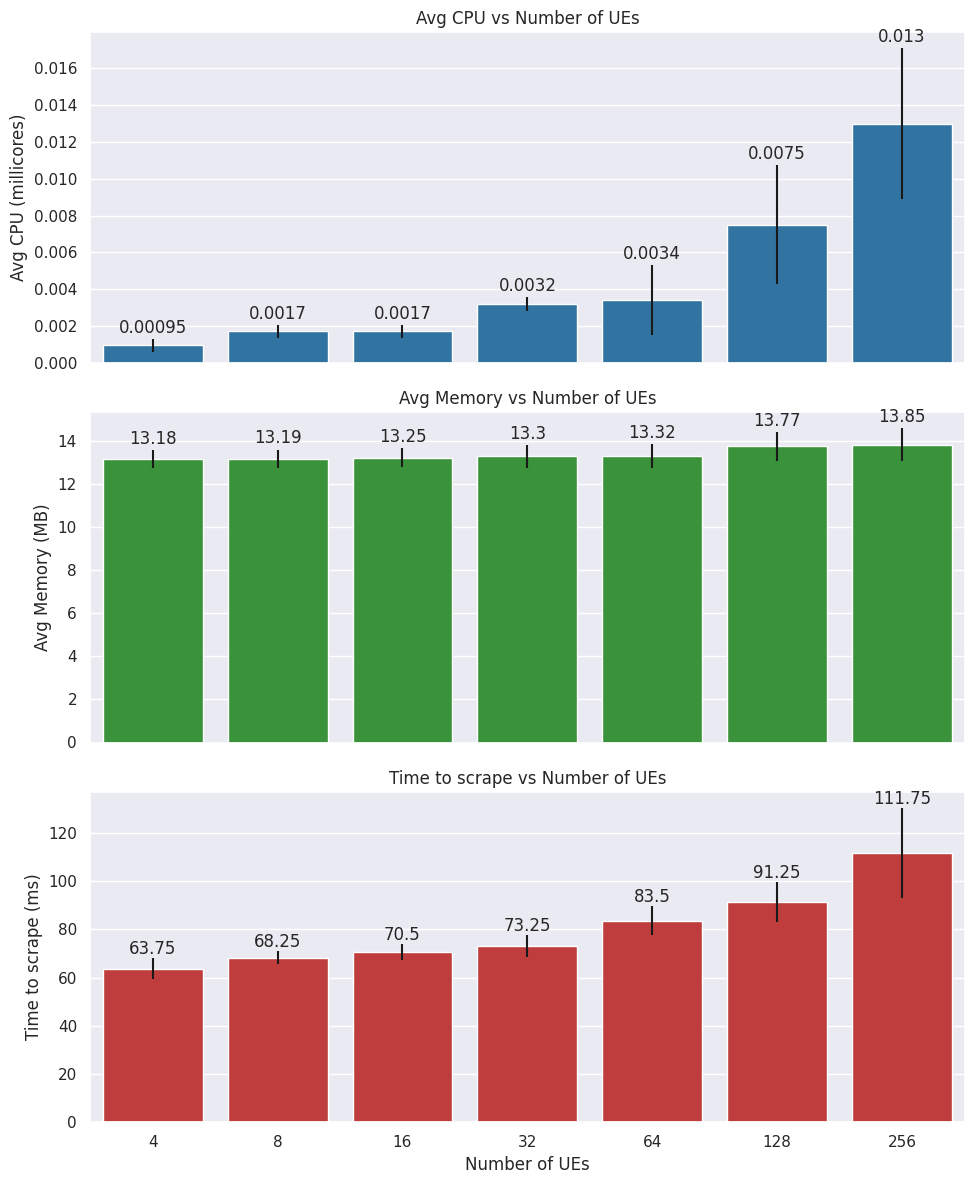

In [8]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Bar plot for Avg CPU vs Number UEs
sns.barplot(x='Number UEs', y='Avg CPU (millicores)', yerr=df['Std Dev CPU'], data=df, ax=axs[0], color='tab:blue')
axs[0].set_title('Avg CPU vs Number of UEs')
axs[0].set_ylabel('Avg CPU (millicores)')

# Annotate the values of each bar
for i, v in enumerate(df['Avg CPU (millicores)']):
    axs[0].annotate(str(round(v, 5)), (i, v + df['Std Dev CPU'][i] + 0.0001), ha='center', va='bottom')

# Bar plot for Avg Memory vs Number UEs
sns.barplot(x='Number UEs', y='Avg Memory (MB)', yerr=df['Std Dev Memory'], data=df, ax=axs[1], color='tab:green')
axs[1].set_title('Avg Memory vs Number of UEs')
axs[1].set_ylabel('Avg Memory (MB)')

# Annotate the values of each bar
for i, v in enumerate(df['Avg Memory (MB)']):
    axs[1].annotate(str(round(v, 2)), (i, v + df['Std Dev Memory'][i] + 0.1), ha='center', va='bottom')

# Bar plot for Time to solve vs Number UEs
sns.barplot(x='Number UEs', y='Time (ms)', yerr=df['Std Dev Time'], data=df, ax=axs[2], color='tab:red')
axs[2].set_title('Time to scrape vs Number of UEs')
axs[2].set_xlabel('Number of UEs')
axs[2].set_ylabel('Time to scrape (ms)')
#axs[2].set_yscale('log')

# Annotate the values of each bar
for i, v in enumerate(df['Time (ms)']):
    axs[2].annotate(str(round(v, 3)), (i, v + df['Std Dev Time'][i] + 0.001), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/xApp-Monitoring.pdf', bbox_inches='tight')
plt.savefig('out/xApp-Monitoring.png', dpi=300, bbox_inches='tight')
plt.show()